In [357]:
import os
import sys
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

# Functions definition:

In [358]:
def APA(N,q,w,X,mu,delta,It,MSE1):
    for i in range(0, N):
        if i > q:
            qq = range(i, i - q, -1)
            yvec = y[qq]
            Xq = inputvec(qq)
            Xq = np.reshape(Xq, newshape=(Xq.shape[0], Xq.shape[1]))
            e = yvec - np.dot(Xq, w)    # Calculating error
            eins = y[i] - np.dot(w.T, inputvec(i))
            w = w + mu * np.dot(np.dot(Xq.T, np.linalg.inv(delta*np.eye(q)+np.dot(Xq, Xq.T))), e) # updating omega
            MSE1[i, It] = eins ** 2 # Matrix being filled with values of error squared 
    

def RLS(N,inputvec,X,w,delta,L,It,MSE2):
    P = (1/delta) * np.eye(L)
    for i in range(0, N):
        gamma = 1/(1+np.dot(inputvec(i).T, np.dot(P,inputvec(i))))
        gi = np.dot(P, inputvec(i)) * gamma
        e = y[i] - np.dot(w.T, inputvec(i))   # Calculating error
        w = w + gi * e      # updating omega
        P = P - np.dot(gi, gi.T)/gamma
        MSE2[i, It] = e ** 2        # Matrix being filled with values of error squared 
    

def NLMS(N,inputvec,mu,w,delta,It,MSE3):
    for i in range(0, N):
        e = y[i] - np.dot(w.T, inputvec(i)) # Calculating error
        mun = mu / (delta+np.dot(inputvec(i).T, inputvec(i)))
        w = w + mun * e * inputvec(i)     # updating omega
        MSE3[i, It] = e ** 2        # Matrix being filled with values of error squared 
    

# Initialization of variables:

In [359]:
L = 200  # Dimension of the unknown vector
N = 3500  # Number of data points
IterNo = 100 # Number of iterations
noisevar = 0.01
mu_APA = 0.2 # APA mean
mu_NLMS = 1.2 # NLMS mean
delta = 0.001
q = 30  # Number of window used for the APA

# Part i:

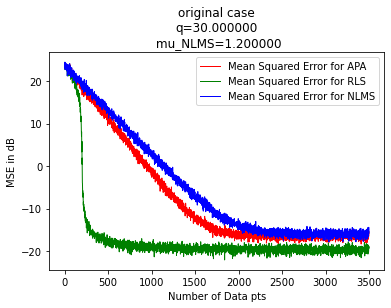

In [360]:
theta = np.random.randn(L, 1)  # random theta
MSE1 = np.zeros((N, IterNo))
MSE2 = np.zeros((N, IterNo))
MSE3 = np.zeros((N, IterNo))

for It in range(0, IterNo): 
    X = np.random.randn(L,N)
    inputvec = lambda n: np.array([X[:, n].copy()]).T
    noise = np.random.randn(N, 1) * np.sqrt(noisevar)
    y = np.zeros((N, 1))
    y[0:N] = np.dot(X[:, 0:N].T, theta) 
    y = y + noise
    
    w = np.zeros((L, 1))
    APA(N,q,w,X,mu_APA,delta,It,MSE1)

    w = np.zeros((L,1)) 
    RLS(N,inputvec,X,w,delta,L,It,MSE2)

    w = np.zeros((L,1)) 
    NLMS(N,inputvec,mu_NLMS,w,delta,It,MSE3)

MSEav1 = sum(MSE1.T) / IterNo
MSEav2 = sum(MSE2.T) / IterNo
MSEav3 = sum(MSE3.T) / IterNo

plt.plot(10 * np.log10(MSEav1), 'r', lw=1, label = 'Mean Squared Error for APA')
plt.plot(10 * np.log10(MSEav2), 'g', lw=1, label = 'Mean Squared Error for RLS')
plt.plot(10 * np.log10(MSEav3), 'b', lw=1, label = 'Mean Squared Error for NLMS')
plt.xlabel('Number of Data pts')
plt.ylabel('MSE in dB')
plt.title("original case" + "\nq=%f" %q + "\n mu_NLMS=%f" %mu_NLMS)
plt.legend(loc=0)
plt.show()

# Initialization for Part ii

In [361]:
L = 200  # Dimension of the unknown vector
N = 3500 # Number of data points
Iterations = 100 # Number of iterations
noisevar = 0.01 # Noise variance
mu_APA = 0.2 # APA mean, changing it doesn't have much effect
mu_NLMS = np.array([0.3,0.8,1.3,]) # NLMS mean
delta = np.array([0.001, 10, 100])
q = np.array([30,60,120])  # Number of window used for the APA

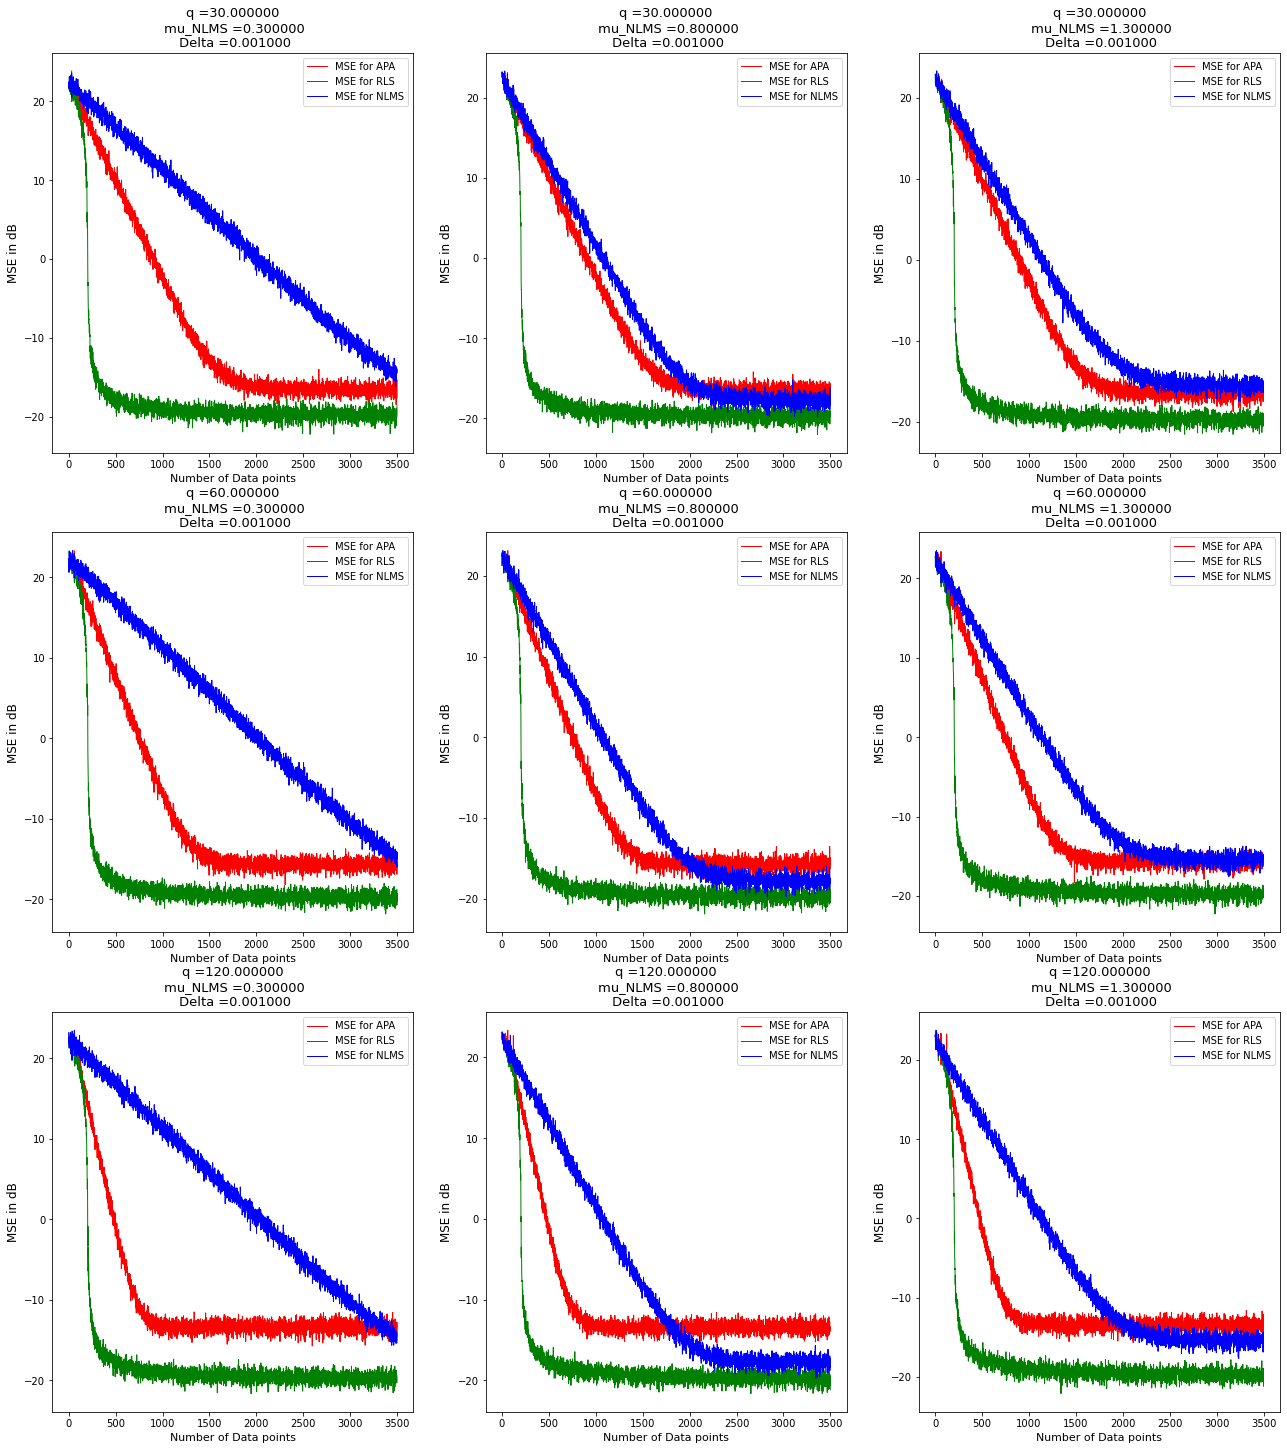

CHANGING DELTA NOW:


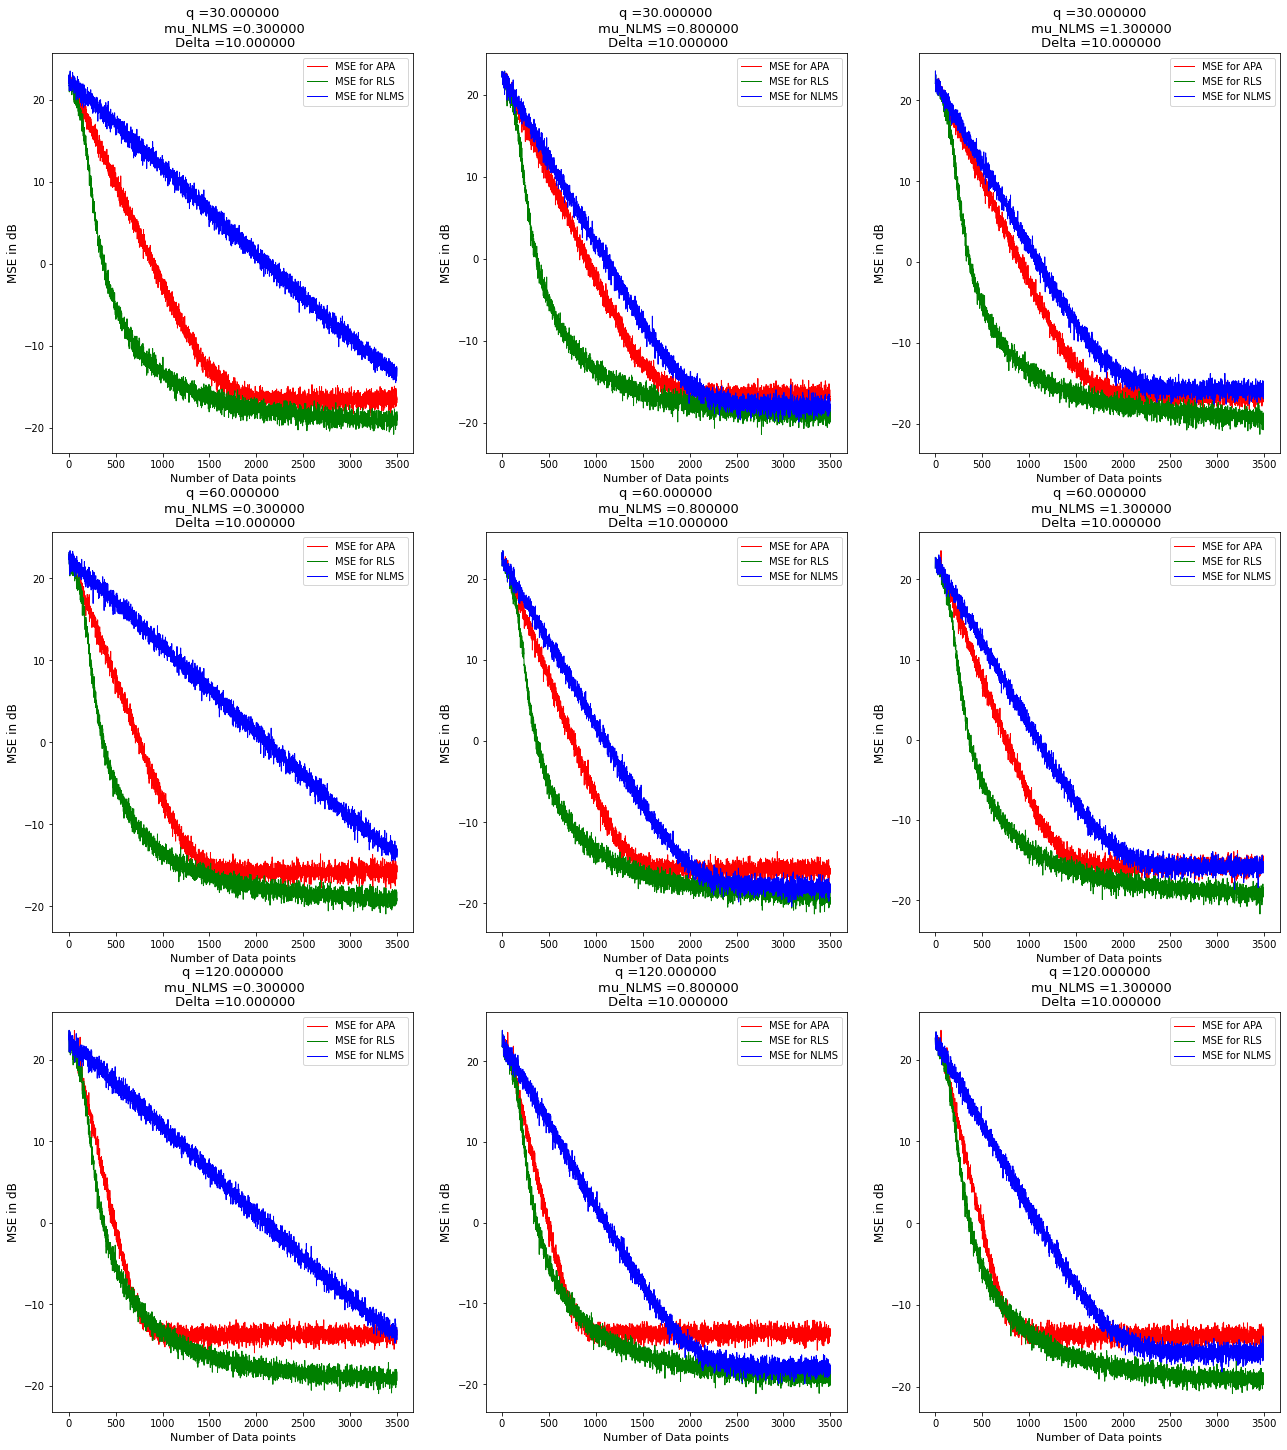

CHANGING DELTA NOW:


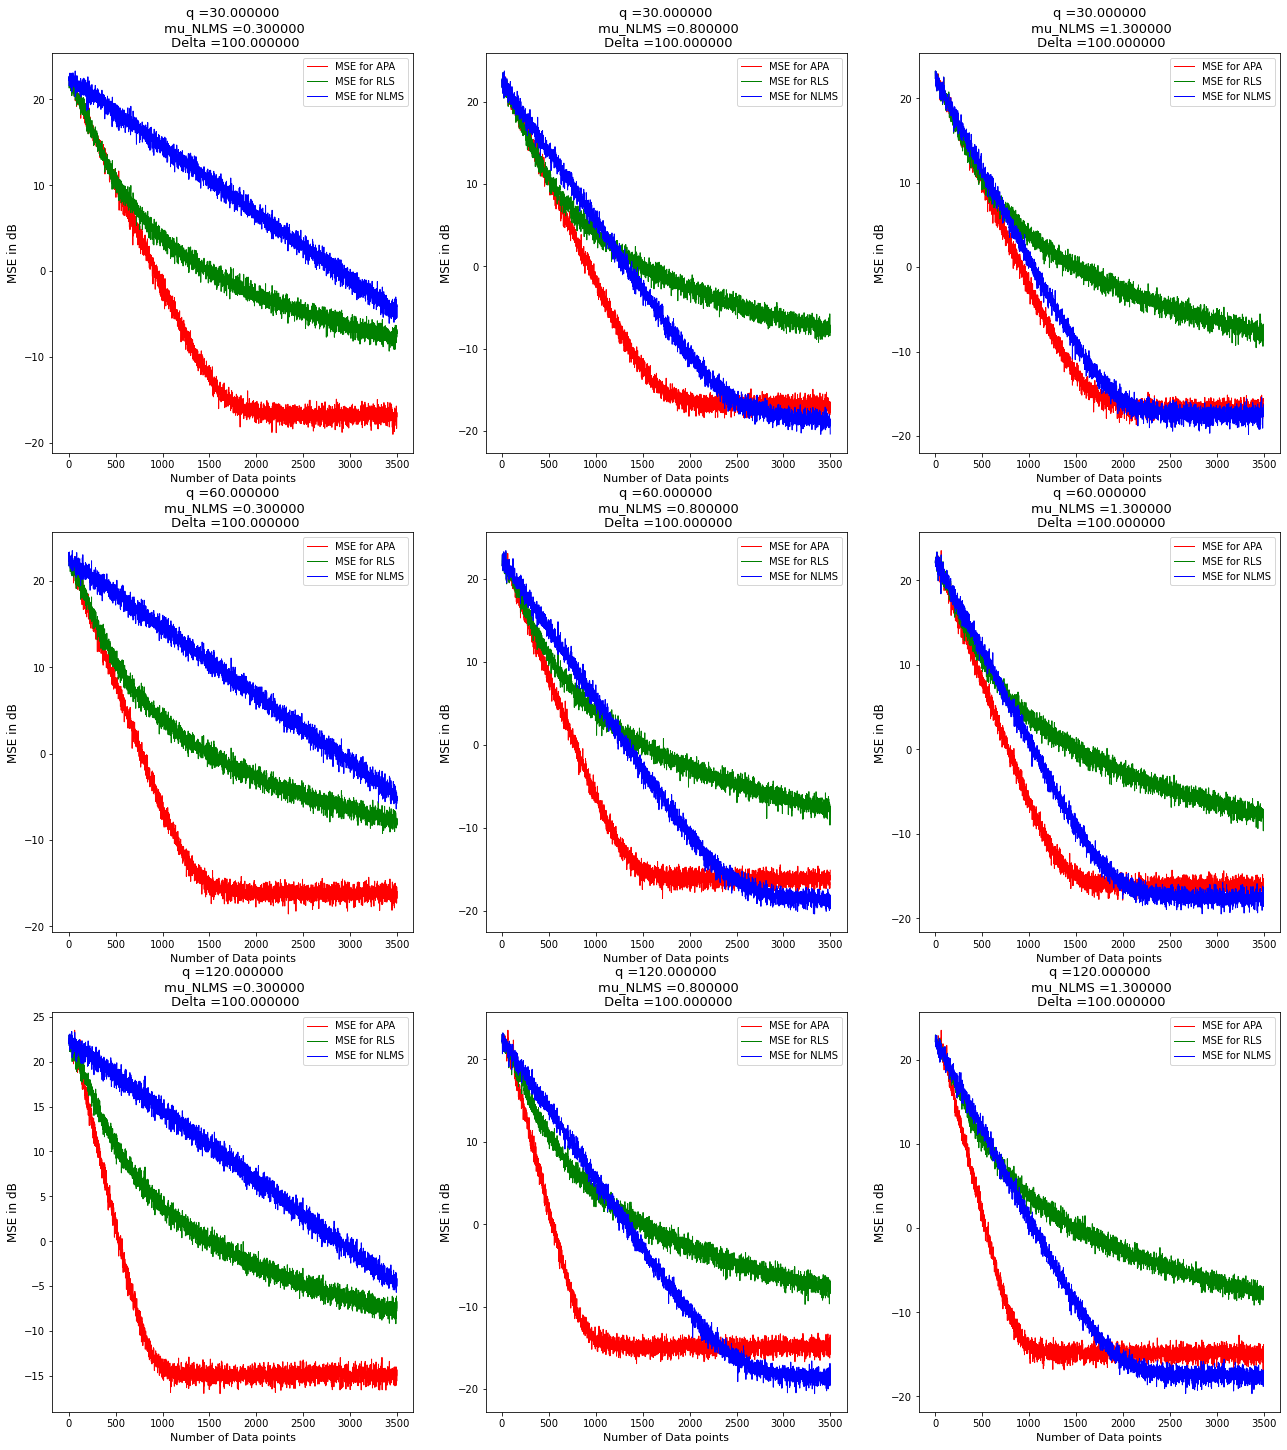

In [362]:
theta = np.random.randn(L, 1)  # random theta

MSE_APA = np.zeros((N, Iterations))
MSE_RLS = np.zeros((N, Iterations))
MSE_NLMS = np.zeros((N, Iterations))

for k in range (len(delta)):
    plt.figure(figsize = (22,25))
    H=1
    for i in range (len(q)):
        for j in range(len(mu_NLMS)):
            for It in range(0, Iterations): 
                X = np.random.randn(L,N)
                inputvec = lambda n: np.array([X[:, n].copy()]).T
                noise = np.random.randn(N, 1) * np.sqrt(noisevar)
                y = np.zeros((N, 1))
                y[0:N] = np.dot(X[:, 0:N].T, theta) 
                y = y + noise

                w = np.zeros((L, 1))
                APA(N,q[i],w,X,mu_APA,delta[k],It,MSE_APA)

                w = np.zeros((L,1)) 
                RLS(N,inputvec,X,w,delta[k],L,It,MSE_RLS)

                w = np.zeros((L,1)) 
                NLMS(N,inputvec,mu_NLMS[j],w,delta[k],It,MSE_NLMS)

            MSEav_APA = sum(MSE_APA.T) / Iterations
            MSEav_RLS = sum(MSE_RLS.T) / Iterations
            MSEav_NLMS = sum(MSE_NLMS.T) / Iterations

            plt.subplot(len(q), len(mu_NLMS), H)
            plt.plot(10 * np.log10(MSEav_APA), 'r', lw=1, label = 'MSE for APA')
            plt.plot(10 * np.log10(MSEav_RLS), 'g', lw=1, label = 'MSE for RLS')
            plt.plot(10 * np.log10(MSEav_NLMS), 'b', lw=1, label = 'MSE for NLMS')
            plt.xlabel('Number of Data points',size=11)
            plt.ylabel('MSE in dB',size=12)
            plt.title("q =%f" %q[i] + "\n mu_NLMS =%f" %mu_NLMS[j]+ "\n Delta =%f" %delta[k],size=13)
            plt.legend()
            H = H + 1
            
    plt.show()
    if(k<2):
        print('CHANGING DELTA NOW:')

# Comments:

- As q is increased, APA curve converges faster but the error floor stays constant, it is so because q is the window size, increasing window size will involve more data points in the algorithm which in turn will make the algorithm complex but the error will reduce faster.

- Increasing the mu of NLMS will make the error converge faster and also reduces the error floor which means an increased performance of the NLMS algorithm, it is so because larger the mean, larger is omega (w) hence the error reduces.

- Increasing value of delta doesn't have any visible effect, if delta is increased significantly it will have negative effects which will be visible in RLS algorithm, it converges the error slower and the error floor is also higher.